#  🎥Movies Recommendation📹
## Based on Genres, Movie Actors, Released Year and IMDb Rating

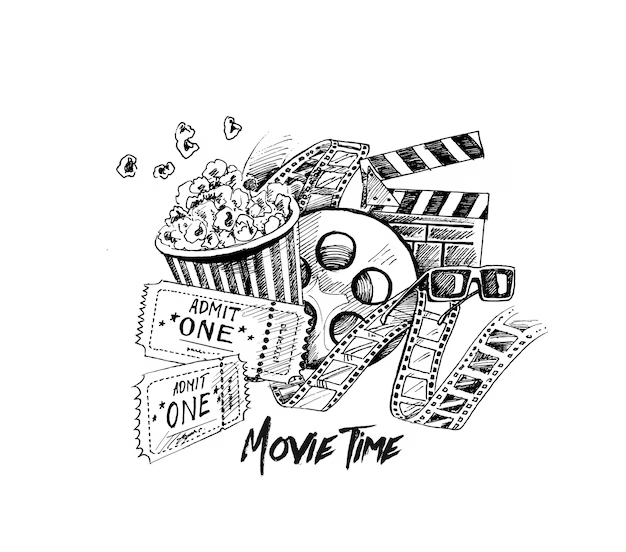

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [48]:
df = pd.read_csv(r"imdb_1000.csv")

In [49]:
df.head()

,Index,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110.0,28341469.0
1,2,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367.0,134966411.0
2,3,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232.0,534858444.0
3,4,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952.0,57300000.0
4,5,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845.0,4360000.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1000 non-null   int64  
 1   Poster_Link    1000 non-null   object 
 2   Series_Title   1000 non-null   object 
 3   Released_Year  1000 non-null   object 
 4   Certificate    899 non-null    object 
 5   Runtime        1000 non-null   object 
 6   Genre          1000 non-null   object 
 7   IMDB_Rating    1000 non-null   float64
 8   Overview       1000 non-null   object 
 9   Meta_score     843 non-null    float64
 10  Director       1000 non-null   object 
 11  Star1          1000 non-null   object 
 12  Star2          1000 non-null   object 
 13  Star3          1000 non-null   object 
 14  Star4          1000 non-null   object 
 15  No_of_Votes    1000 non-null   float64
 16  Gross          831 non-null    float64
dtypes: float64(4), int64(1), object(12)
memory usage: 132

In [51]:
df.describe()

,Index,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,500.500000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,288.819436,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,250.750000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,500.500000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,750.250000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,1000.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


In [52]:
df.columns

Index(['Index', 'Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [53]:
df.shape

(1000, 17)

In [54]:
df.size

17000

# Data Cleaning

In [91]:
df.duplicated().sum()

0

### -> No duplicated data

In [56]:
df.isnull().sum()

Index              0
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### -> Null values in Certificate, Meta_score & Gross

In [57]:
df['Meta_score'].mean()

77.97153024911032

In [58]:
df['Meta_score'].median()

79.0

In [59]:
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

In [60]:
df['Gross'].mean()

68034750.87364621

In [61]:
df['Gross'].fillna(df['Gross'].mean(),inplace=True)

In [62]:
df['Certificate'].value_counts()

U           234
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: Certificate, dtype: int64

In [63]:
df['Certificate'].fillna('U',inplace=True)

In [64]:
df["Certificate"]=df["Certificate"].replace({'PG-13':'UA','PG':'UA','G':'U','Approved':'U','Passed':'A','TV-14':'UA','TV-PG':'UA','GP':'UA','16.00':'UA','TV-MA':'A','Unrated':'R','U/A':'R','16':'UA'})
df["Certificate"]

0       A
1       A
2      UA
3       A
4       U
       ..
995     A
996     U
997     A
998     U
999     U
Name: Certificate, Length: 1000, dtype: object

In [65]:
df['Certificate'].value_counts()

U     358
UA    262
A     232
R     148
Name: Certificate, dtype: int64

In [66]:
df["Certificate"].isnull().sum()

0

In [67]:
df.isnull().sum()

Index            0
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

# Data Visualisation & Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'UA'), Text(2, 0, 'U'), Text(3, 0, 'R')])

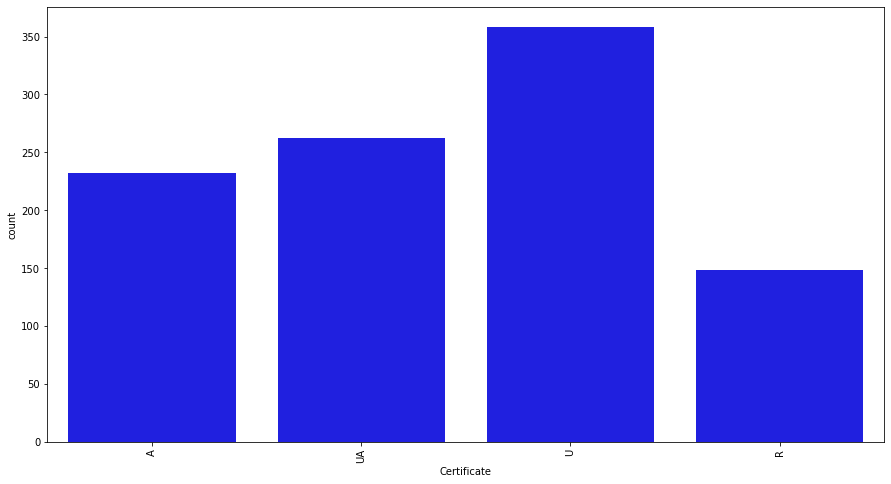

In [68]:
plt.figure(figsize=(15,8))
sns.countplot('Certificate',color='blue',data=df)
plt.xticks(rotation = 'vertical')

### -> Most movies was 'U' IMDB certificate i.e suitable for all ages

In [69]:
top_rates=df.groupby('Genre').mean().sort_values('IMDB_Rating',ascending=False).head(10)
top_rates = top_rates[['IMDB_Rating']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
5,"Crime, Drama, Music",8.30
6,"Mystery, Romance, Thriller",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Drama, Fantasy, Horror",8.30
9,"Comedy, Musical, Romance",8.30


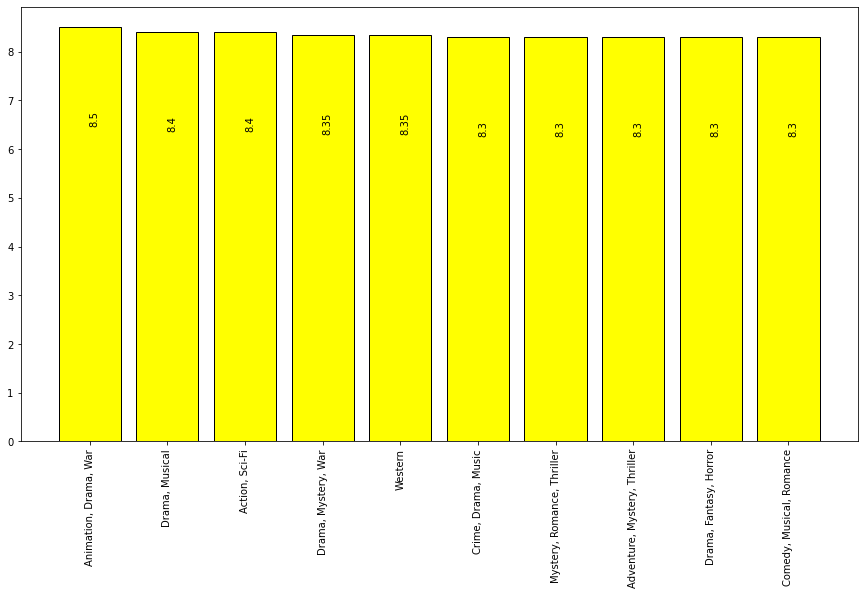

In [70]:
plt.figure(figsize=(15,8))
plt.bar(top_rates['Genre'],top_rates['IMDB_Rating'],color='Yellow',edgecolor='black' )
plt.xticks(rotation='vertical')
for k,v in top_rates['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=90)

### -> Movies whos genre 'Animation, Drama, War' acieved the most rate

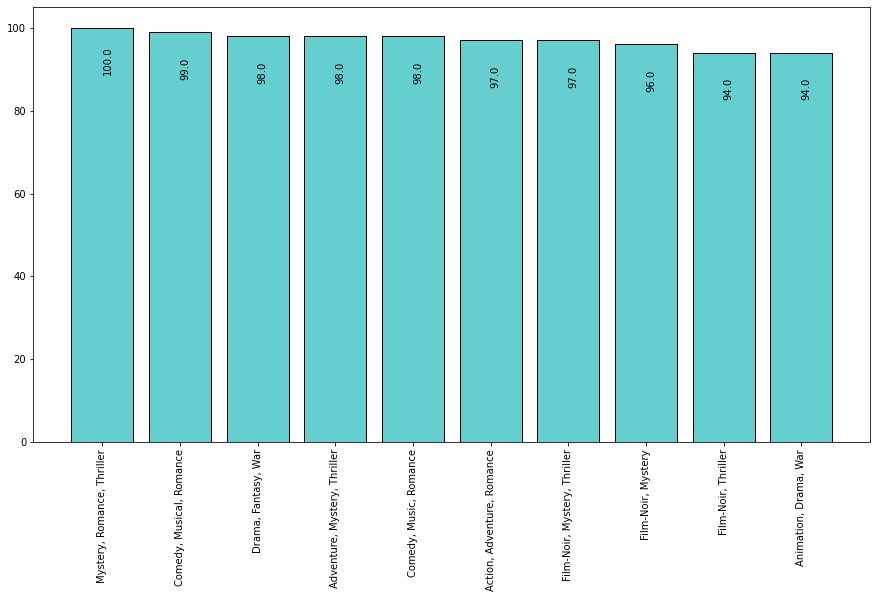

In [71]:
top_rates=df.groupby('Genre').mean().sort_values('Meta_score',ascending=False).head(10)
top_rates = top_rates[['Meta_score']].round(2)
top_rates.reset_index(inplace=True)
plt.figure(figsize=(15,8))
plt.bar(top_rates['Genre'],top_rates['Meta_score'],color='#65cfd0',edgecolor='black' )
plt.xticks(rotation='vertical')
for k,v in top_rates['Meta_score'].items():
    plt.text(k,v-11,str(v),rotation=90)

### -> Movies whose genre 'Mystery, Romance, Thriller' achieved higher meta score

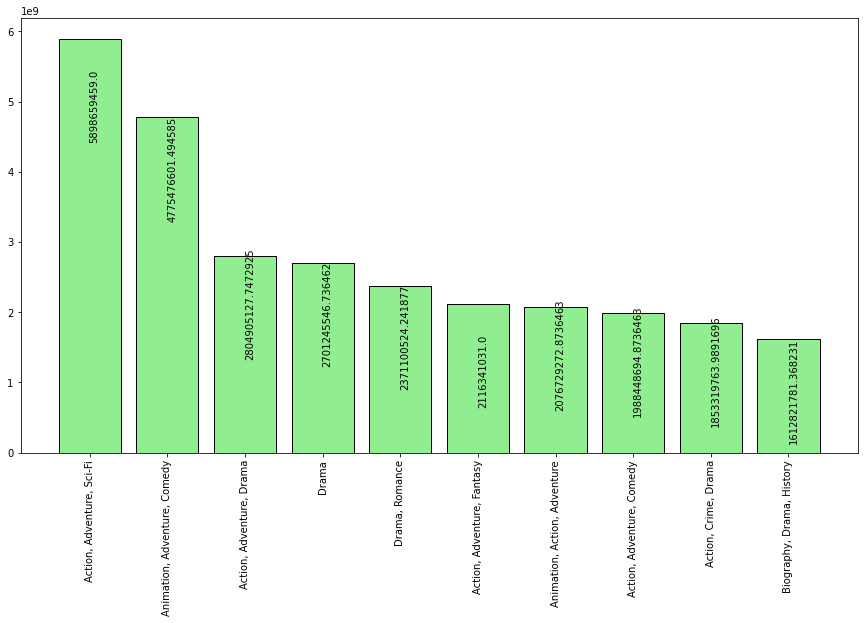

In [72]:
top_earn = df.groupby('Genre').sum().sort_values('Gross',ascending=False).head(10)
top_earn=top_earn[['Gross']]
top_earn.reset_index(inplace=True)
plt.figure(figsize=(15,8))
plt.bar(top_earn['Genre'],top_earn['Gross'],color='Lightgreen',edgecolor='black')
plt.xticks(rotation='vertical')
for k,v in top_earn['Gross'].items():
    plt.text(k,v-1450000000,str(v),rotation=90)

### -> Movies whose genre 'Action,Adventure ,Sci-Fi' achieve the most earnings

(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'UA'), Text(2, 0, 'U'), Text(3, 0, 'R')])

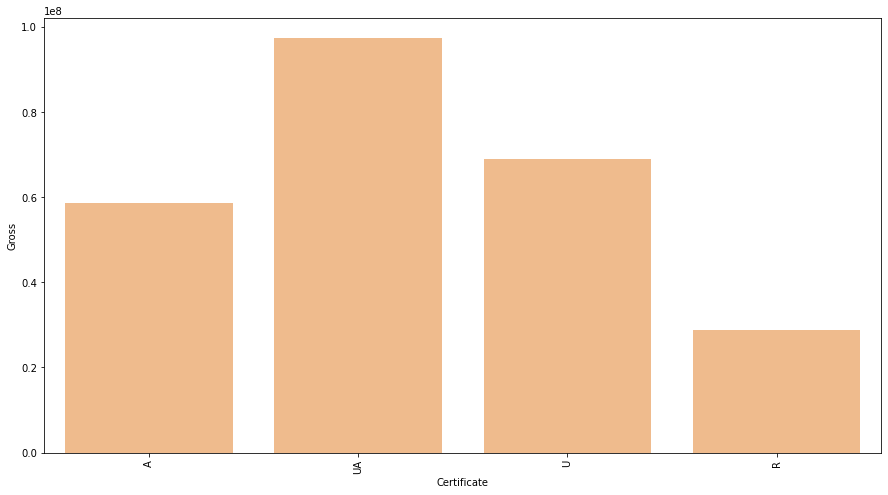

In [73]:
plt.figure(figsize=(15,8))
sns.barplot(x='Certificate',y='Gross',color='#ffba7d',data=df,ci=False)
plt.xticks(rotation='vertical')

### -> Movies whose certificates 'UA' acheived more earnings

<AxesSubplot:xlabel='IMDB_Rating', ylabel='Gross'>

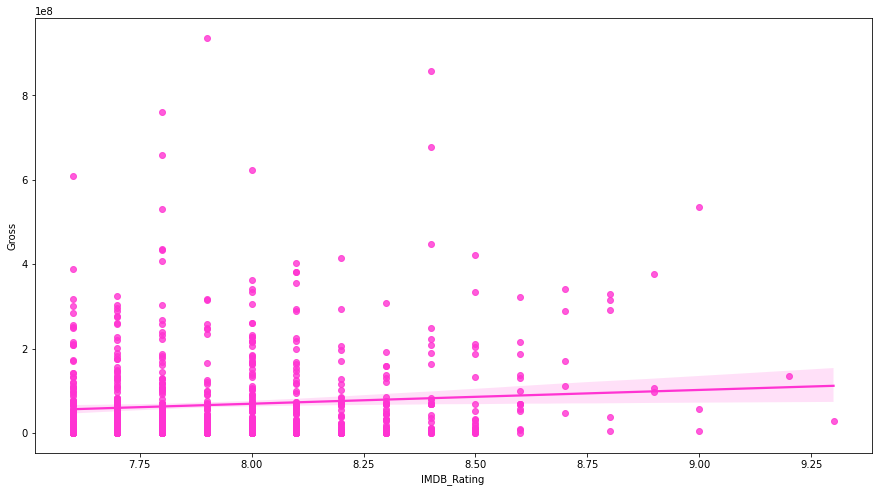

In [74]:
plt.figure(figsize=(15,8))
sns.regplot(x='IMDB_Rating',y='Gross',data=df,color='#FF33D2')

### -> There's a week positive relationship between IMDB rating and earnings of the movie

<AxesSubplot:xlabel='Meta_score', ylabel='Gross'>

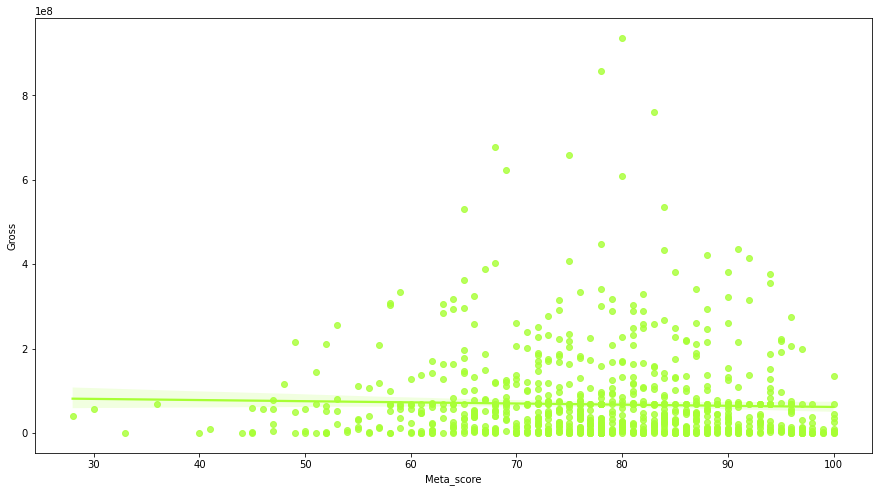

In [75]:
plt.figure(figsize=(15,8))
sns.regplot(x='Meta_score',y='Gross',data=df,color='#A7FF33')

### -> Approximately the higher meta score movie gain the higher earnings

In [76]:
from collections import Counter
from typing import Dict, Text
from ast import literal_eval
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

(-1.25, 1.25, -1.25, 1.25)

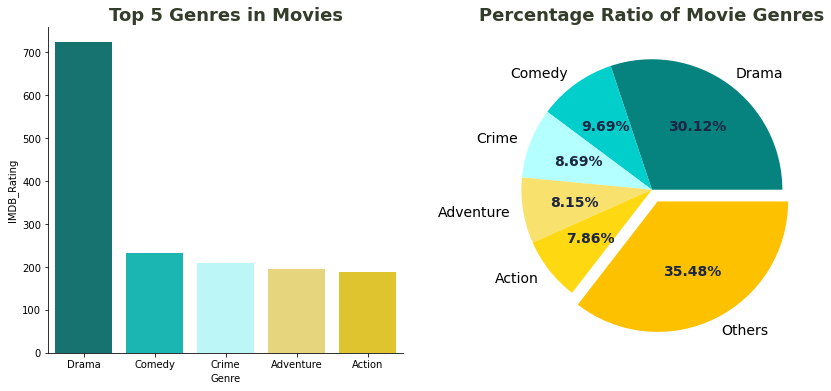

In [77]:
genres_list = []
for i in df['Genre']:
    genres_list.extend(i.split(', '))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['Genre', 'IMDB_Rating'])
ax = sns.barplot(data=df_plot, x='Genre', y='IMDB_Rating', ax=axes[0], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight=600, color='#333d29')
sns.despine()

df_plot_full = pd.DataFrame([Counter(genres_list)]).transpose().sort_values(by=0, ascending=False)
df_plot.loc[len(df_plot)] = {'Genre': 'Others', 'IMDB_Rating':df_plot_full[6:].sum()[0]}
plt.title('Percentage Ratio of Movie Genres', fontsize=18, weight=600, color='#333d29')
wedges, texts, autotexts = axes[1].pie(x=df_plot['IMDB_Rating'], labels=df_plot['Genre'], autopct='%.2f%%',
                                       textprops=dict(fontsize=14), explode=[0,0,0,0,0,0.1], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

axes[1].axis('off')



# Movie Recommendation

In [78]:
list_of_all_titles = df['Series_Title'].tolist()
print(list_of_all_titles)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather: Part II', '12 Angry Men', 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', "Schindler's List", 'Inception', 'Fight Club', 'The Lord of the Rings: The Fellowship of the Ring', 'Forrest Gump', 'Il buono, il brutto, il cattivo', 'The Lord of the Rings: The Two Towers', 'The Matrix', 'Goodfellas', 'Star Wars: Episode V - The Empire Strikes Back', "One Flew Over the Cuckoo's Nest", 'Hamilton', 'Gisaengchung', 'Soorarai Pottru', 'Interstellar', 'Cidade de Deus', 'Sen to Chihiro no kamikakushi', 'Saving Private Ryan', 'The Green Mile', 'La vita è bella', 'Se7en', 'The Silence of the Lambs', 'Star Wars', 'Seppuku', 'Shichinin no samurai', "It's a Wonderful Life", 'Joker', 'Whiplash', 'The Intouchables', 'The Prestige', 'The Departed', 'The Pianist', 'Gladiator', 'American History X', 'The Usual Suspects', 'Léon', 'The Lion King', 'Terminator 2: Judgment Day', 'Nuovo Cinema Paradiso', 'Hotaru no hak

In [79]:
len(list_of_all_titles)

1000

In [80]:
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer - This is used to convert text data into numerical values
from sklearn.metrics.pairwise import cosine_similarity

In [81]:
combined_features = df['Genre']+' '+df['Series_Title']+' '+df['Overview']+' '+df['Director']+' '+df['Star1']+' '+df['Star2']+' '+df['Star3']+' '+df['Star4'] 
display (combined_features)

0      Drama The Shawshank Redemption Two imprisoned ...
1      Crime, Drama The Godfather An organized crime ...
2      Action, Crime, Drama The Dark Knight When the ...
3      Crime, Drama The Godfather: Part II The early ...
4      Crime, Drama 12 Angry Men A jury holdout attem...
                             ...                        
995    Comedy, Drama, Romance Breakfast at Tiffany's ...
996    Drama, Western Giant Sprawling epic covering t...
997    Drama, Romance, War From Here to Eternity In H...
998    Drama, War Lifeboat Several survivors of a tor...
999    Crime, Mystery, Thriller The 39 Steps A man in...
Length: 1000, dtype: object

In [82]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
display (feature_vectors.shape)
print (feature_vectors)

(1000, 10465)

  (0, 8115)	0.22667726151759146
  (0, 10166)	0.1437716599756909
  (0, 3931)	0.22667726151759146
  (0, 1140)	0.16337937666603272
  (0, 3484)	0.1703893988221628
  (0, 6286)	0.17611700396754335
  (0, 7930)	0.19789212166450235
  (0, 9419)	0.15595325764116597
  (0, 2219)	0.21393963421608084
  (0, 3455)	0.1486142811252038
  (0, 2290)	0.22667726151759146
  (0, 1874)	0.20490214382063246
  (0, 181)	0.21393963421608084
  (0, 9401)	0.14609975112456736
  (0, 3037)	0.22667726151759146
  (0, 440)	0.05022721575708664
  (0, 8722)	0.21393963421608084
  (0, 3311)	0.18312702612367343
  (0, 10319)	0.13179105374641303
  (0, 6694)	0.09540779922677488
  (0, 6639)	0.20490214382063246
  (0, 6835)	0.1486142811252038
  (0, 1165)	0.16787486882152639
  (0, 6053)	0.14057417146203618
  (0, 4515)	0.17942688921761119
  :	:
  (999, 8065)	0.13396134924341754
  (999, 4245)	0.11671077126666339
  (999, 10118)	0.1233860188608508
  (999, 9580)	0.11845021395824709
  (999, 8948)	0.13396134924341754
  (999, 6396)	0.085904482996

In [83]:
similarity = cosine_similarity(feature_vectors)
print(similarity )

[[1.         0.00865157 0.02548445 ... 0.0038971  0.03625864 0.00965447]
 [0.00865157 1.         0.03835746 ... 0.01953415 0.01303079 0.02375224]
 [0.02548445 0.03835746 1.         ... 0.01978103 0.04839229 0.06629547]
 ...
 [0.0038971  0.01953415 0.01978103 ... 1.         0.03917757 0.03360311]
 [0.03625864 0.01303079 0.04839229 ... 0.03917757 1.         0.05770025]
 [0.00965447 0.02375224 0.06629547 ... 0.03360311 0.05770025 1.        ]]


In [84]:
selected_features = ['Genre','Series_Title','Overview','Director','Star1','Star2','Star3','Star4']
print(selected_features)

['Genre', 'Series_Title', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']


In [85]:
display (df[selected_features].head())

,Genre,Series_Title,Overview,Director,Star1,Star2,Star3,Star4
0,Drama,The Shawshank Redemption,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,"Crime, Drama",The Godfather,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,"Action, Crime, Drama",The Dark Knight,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,"Crime, Drama",The Godfather: Part II,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,"Crime, Drama",12 Angry Men,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [86]:
display (df[selected_features].isna().sum())

Genre           0
Series_Title    0
Overview        0
Director        0
Star1           0
Star2           0
Star3           0
Star4           0
dtype: int64

### -> Movie suggestions on the bases of geners

In [92]:
import pandas as pd

def recommend_movies_by_genre(df, preferred_genre):
    try:
        filtered_movies = df[df['Genre'].str.contains(preferred_genre, case=False
                                                     )]
        recommended_movies = filtered_movies.sort_values(by='IMDB_Rating', ascending=False)[['Series_Title', 'IMDB_Rating']]
        return recommended_movies.values.tolist()
    except KeyError:
        print("Error: 'Genre' column not found in the DataFrame.")
        return []
df = pd.read_csv(r"C:\Users\Admin\Desktop\Edunet\Project\imdb_1000.csv")
preferred_genre = input("Enter your preferred movie genre (case-insensitive): ")
recommended_movies = recommend_movies_by_genre(df, preferred_genre)
if recommended_movies:
    print("Recommended movies for you:")
    for title, rating in recommended_movies:
        print(f"- {title} ({rating:.1f})")
else:
    print("No movies found for that genre.")


Enter your preferred movie genre (case-insensitive): horror
Recommended movies for you:
- Psycho (8.5)
- Alien (8.4)
- The Shining (8.4)
- Tumbbad (8.3)
- The Thing (8.1)
- What Ever Happened to Baby Jane? (8.1)
- Das Cabinet des Dr. Caligari (8.1)
- The Exorcist (8.0)
- Les diaboliques (8.0)
- Rosemary's Baby (8.0)
- Shaun of the Dead (7.9)
- Dawn of the Dead (7.9)
- Night of the Living Dead (7.9)
- King Kong (7.9)
- Freaks (7.9)
- Nosferatu (7.9)
- Frankenstein (7.8)
- The Innocents (7.8)
- Bride of Frankenstein (7.8)
- Get Out (7.7)
- What We Do in the Shadows (7.7)
- Halloween (7.7)
- Repulsion (7.7)
- The Birds (7.7)
- Peeping Tom (7.7)
- Les yeux sans visage (7.7)
- Invasion of the Body Snatchers (7.7)
- The Invisible Man (7.7)
- La piel que habito (7.6)
- Saw (7.6)
- 28 Days Later... (7.6)
- The Others (7.6)


### -> Movie suggestion based on released year

In [93]:
import pandas as pd

def recommend_movies_by_release_year(df, preferred_year):
    try:
        filtered_movies = df[df['Released_Year'] == str(preferred_year)]
        recommended_movies = filtered_movies.sort_values(by='IMDB_Rating', ascending=False)[['Series_Title', 'IMDB_Rating']]
        return recommended_movies.values.tolist()
    except KeyError:
        print("Error: 'Released_Year' column not found in the DataFrame.")
        return []
    except ValueError:
        print("Error: Please enter a valid year as an integer.")
        return []
df = pd.read_csv(r"C:\Users\Admin\Desktop\Edunet\Project\imdb_1000.csv")
preferred_year = int(input("Enter your preferred movie release year: "))
recommended_movies = recommend_movies_by_release_year(df, preferred_year)
if recommended_movies:
    print("Recommended movies for you:")
    
    for title, rating in recommended_movies:
        print(f"- {title} ({rating:.1f})")
else:
    print("No movies found for that release year.")


Enter your preferred movie release year: 2001
Recommended movies for you:
- The Lord of the Rings: The Fellowship of the Ring (8.8)
- Sen to Chihiro no kamikakushi (8.6)
- Amélie (8.3)
- A Beautiful Mind (8.2)
- Dil Chahta Hai (8.1)
- Monsters, Inc. (8.1)
- Lagaan: Once Upon a Time in India (8.1)
- Yeopgijeogin geunyeo (8.0)
- Vizontele (8.0)
- Donnie Darko (8.0)
- No Man's Land (7.9)
- Cowboy Bebop: Tengoku no tobira (7.9)
- Mulholland Dr. (7.9)
- Shrek (7.8)
- Waking Life (7.8)
- I Am Sam (7.7)
- Black Hawk Down (7.7)
- Das Experiment (7.7)
- Hedwig and the Angry Inch (7.7)
- Ocean's Eleven (7.7)
- Training Day (7.7)
- The Royal Tenenbaums (7.6)
- Y tu mamá también (7.6)
- Harry Potter and the Sorcerer's Stone (7.6)
- The Others (7.6)
- Blow (7.6)
- Enemy at the Gates (7.6)


### -> Movie suggestion based on movie star

In [89]:
import pandas as pd
def recommend_movies_by_star(df, preferred_star):
    try:
        filtered_movies = df[df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: x.str.contains(preferred_star, case=False)).any(axis=1)]
        recommended_movies = filtered_movies.sort_values(by='IMDB_Rating', ascending=False)[['Series_Title', 'IMDB_Rating']]
        return recommended_movies.values.tolist()
    except KeyError:
        print("Error: One or more of the star columns ('Star1', 'Star2', 'Star3', 'Star4') not found in the DataFrame.")
        return []
df = pd.read_csv(r"C:\Users\Admin\Desktop\Edunet\Project\imdb_1000.csv")
preferred_star = input("Enter your preferred movie star (case-insensitive): ")
recommended_movies = recommend_movies_by_star(df, preferred_star)
if recommended_movies:
    print("Recommended movies for you:")
    for title, rating in recommended_movies:
        print(f"- {title} ({rating:.1f})")
else:
    print("No movies found with that star.")


Enter your preferred movie star (case-insensitive): tom cruise
Recommended movies for you:
- Magnolia (8.0)
- Rain Man (8.0)
- Edge of Tomorrow (7.9)
- Mission: Impossible - Fallout (7.7)
- The Last Samurai (7.7)
- A Few Good Men (7.7)
- Minority Report (7.6)


### -> Movie suggestion based on IMDB ratings

In [94]:
import pandas as pd

def recommend_movies_by_rating(df, min_rating):
    try:
        filtered_movies = df[df['IMDB_Rating'] >= min_rating]
        recommended_movies = filtered_movies.sort_values(by='IMDB_Rating', ascending=False)[['Series_Title', 'IMDB_Rating']]
        return recommended_movies.values.tolist()
    except KeyError:
        print("Error: 'IMDB_Rating' column not found in the DataFrame.")
        return []
df = pd.read_csv(r"C:\Users\Admin\Desktop\Edunet\Project\imdb_1000.csv")
min_rating = float(input("Enter the minimum IMDb rating for recommendations: "))
recommended_movies = recommend_movies_by_rating(df, min_rating)
if recommended_movies:
    print("Recommended movies for you:")
    for title, rating in recommended_movies:
        print(f"- {title} ({rating:.1f})")
else:
    print("No movies found with a rating of", min_rating, "or higher.")


Enter the minimum IMDb rating for recommendations: 8.5
Recommended movies for you:
- The Shawshank Redemption (9.3)
- The Godfather (9.2)
- The Dark Knight (9.0)
- 12 Angry Men (9.0)
- The Godfather: Part II (9.0)
- The Lord of the Rings: The Return of the King (8.9)
- Pulp Fiction (8.9)
- Schindler's List (8.9)
- The Lord of the Rings: The Fellowship of the Ring (8.8)
- Forrest Gump (8.8)
- Il buono, il brutto, il cattivo (8.8)
- Fight Club (8.8)
- Inception (8.8)
- The Matrix (8.7)
- Goodfellas (8.7)
- Star Wars: Episode V - The Empire Strikes Back (8.7)
- One Flew Over the Cuckoo's Nest (8.7)
- The Lord of the Rings: The Two Towers (8.7)
- The Green Mile (8.6)
- It's a Wonderful Life (8.6)
- Shichinin no samurai (8.6)
- Seppuku (8.6)
- Star Wars (8.6)
- The Silence of the Lambs (8.6)
- Se7en (8.6)
- La vita è bella (8.6)
- Saving Private Ryan (8.6)
- Cidade de Deus (8.6)
- Interstellar (8.6)
- Soorarai Pottru (8.6)
- Gisaengchung (8.6)
- Hamilton (8.6)
- Sen to Chihiro no kamikakush

### -> Movie based on combine features

In [ ]:
combined_features = df['Genre']+' '+df['Series_Title']+' '+df['Overview']+' '+df['Director']+' '+df['Star1']+' '+df['Star2']+' '+df['Star3']+' '+df['Star4'] 
display (combined_features)

In [95]:
import pandas as pd
from difflib import get_close_matches
movie_name = input('Enter your favourite movie name: ')
list_of_all_titles = df['Series_Title'].tolist()
find_close_match = get_close_matches(movie_name, list_of_all_titles)

if find_close_match:
    close_match = find_close_match[0]
    try:
        index_of_the_movie = df[df.Series_Title == close_match].index.tolist()[0]  # Using .iloc
        similarity_score = list(enumerate(similarity[index_of_the_movie]))
        sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)
        print('Movies suggested for you based on your search for "{}": \n'.format(movie_name))
        i = 1
        for movie in sorted_similar_movies:
            index = movie[0]
            title_from_index = df[df.index == index]['Series_Title'].values[0]
            if (i < 31):
                print(i, '.', title_from_index)
                i += 1
    except IndexError:
        print("Movie '{}' not found in the list.".format(close_match))
else:
    print("Movie '{}' not found in the list.".format(movie_name))


Enter your favourite movie name: 3 idiots
Movies suggested for you based on your search for "3 idiots": 

1 . 3 Idiots
2 . Rang De Basanti
3 . Dil Chahta Hai
4 . PK
5 . Lagaan: Once Upon a Time in India
6 . Andaz Apna Apna
7 . Munna Bhai M.B.B.S.
8 . Chhichhore
9 . The Odd Couple
10 . The Goonies
11 . My Cousin Vinny
12 . Taare Zameen Par
13 . Down by Law
14 . Funny Games
15 . The Hangover
16 . The Treasure of the Sierra Madre
17 . Mystic River
18 . Papillon
19 . Zindagi Na Milegi Dobara
20 . Guess Who's Coming to Dinner
21 . Jeux d'enfants
22 . Happiness
23 . Interstate 60: Episodes of the Road
24 . Eternal Sunshine of the Spotless Mind
25 . A Night at the Opera
26 . Dangal
27 . Star Trek II: The Wrath of Khan
28 . South Park: Bigger, Longer & Uncut
29 . Druk
30 . Almost Famous
